# CDC WONDER API 
The following program fetches Mortality Data from the CDC Open Source Data Base using WONDER API's https://wonder.cdc.gov/
It is based on the repository from A. Lipphart  https://github.com/alipphardt/cdc-wonder-api/ 
The CDC querry tool allows for the selections of several parameters and data can be grouped in filtered returning a table, tab-delimited line listing, that can be exported and visualized (max number of rows 75K)
The API can also be use by POST request as a XLM over HTML. This request and the information about the parameters can be found https://wonder.cdc.gov/wonder/help/WONDER-API.html

In [2]:
# Data is selected "by-variables" are are selected from the "Group Results By" AND the "And By" drop-down lists 
# in the "Request Form." The "by-variables" categories will be rows and the measurements will be columns 
# M_ are measures to return, the default measures plus any optional measures.

# For this example, will group by year and race

b_parameters = {
    "B_1": "D76.V9-level1", # D76.V9-level2
    "B_2": "D76.V9-level2",        # D76.V5
    "B_3": "D76.V7",        # D76.V7
    "B_4": "D76.V1-level1", 
    "B_5": "*None*"
}

In [4]:
# measures to return, the default measures plus any optional measures

# For this example, include deaths, population, and crude rate

m_parameters = {
    "M_1": "D76.M1",   # Deaths, must be included
    "M_2": "D76.M2",   # Population, must be included
    "M_3": "D76.M3",   # Crude rate, must be included
    #"M_31": "D76.M31",        # Standard error (crude rate)
    #"M_32": "D76.M32"         # 95% confidence interval (crude rate)
    "M_9": "D76.M9",   # 
    "M_41": "D76.M41", # Standard error (age-adjusted rate)
    "M_42": "D76.M42"  # 95% confidence interval (age-adjusted rate)
}

In [6]:
# values highlighted in a "Finder" control for hierarchical lists, 
# such as the "Regions/Divisions/States/Counties hierarchical" list.

# For this example, include all years, months, census regions, hhs regions, states. Only include ICD-10 K00-K92
# for disease of the digestive system

f_parameters = {
    "F_D76.V1": ["*All*"], # year/month
    "F_D76.V10": ["*All*"], # Census Regions - dont change
    "F_D76.V2": ["K00-K92"], # ICD-10 Codes
    "F_D76.V27": ["*All*"], # HHS Regions - dont change
    "F_D76.V9": ["*All*"] # State County - dont change
}

In [7]:
# contents of the "Currently selected" information areas next to "Finder" controls in the "Request Form."

# For this example, include all dates, census regions, hhs regions, and states.
# Only include ICD-10 code K00-K92 for disease of the digestive system

i_parameters = {
    "I_D76.V1": "*All* (All Dates)",  # year/month
    "I_D76.V10": "*All* (The United States)", # Census Regions - dont change
    "I_D76.V2": "K00-K92 (Diseases of the digestive system)", # ICD-10 Codes
    "I_D76.V27": "*All* (The United States)", # HHS Regions - dont change
    "I_D76.V9": "*All* (The United States)" # State County - dont change
}

In [8]:
# For this example, we want to include ten-year age groups for ages 15-44.
# For all other categories, include all values

v_parameters = {
    "V_D76.V1": "",         # Year/Month
    "V_D76.V10": "",        # Census Regions
    "V_D76.V11": "*All*",   # 2006 Urbanization
    "V_D76.V12": "*All*",   # ICD-10 130 Cause List (Infants)
    "V_D76.V17": "*All*",   # Hispanic Origin
    "V_D76.V19": "*All*",   # 2013 Urbanization
    "V_D76.V2": "",         # ICD-10 Codes
    "V_D76.V20": "*All*",   # Autopsy
    "V_D76.V21": "*All*",   # Place of Death
    "V_D76.V22": "*All*",   # Injury Intent
    "V_D76.V23": "*All*",   # Injury Mechanism and All Other Leading Causes
    "V_D76.V24": "*All*",   # Weekday
    "V_D76.V25": "*All*",   # Drug/Alcohol Induced Causes
    "V_D76.V27": "",        # HHS Regions
    "V_D76.V4": "*All*",    # ICD-10 113 Cause List
    "V_D76.V5": ["15-24", "25-34", "35-44"], # Ten-Year Age Groups
    "V_D76.V51": "*All*",   # Five-Year Age Groups
    "V_D76.V52": "*All*",   # Single-Year Ages
    "V_D76.V6": "00",       # Infant Age Groups
    "V_D76.V7": "*All*",    # Gender
    "V_D76.V8": "*All*",    # Race
    "V_D76.V9": ""          # State/County SAME   
}

In [9]:
# other parameters, such as radio buttons, checkboxes, and lists that are not data categories

# For this example, include age-adjusted rates, use ten-year age groups (D76.V5), use state location by default, 
# show rates per 100,000, use 2013 urbanization and use ICD-10 Codes (D76.V2) for cause of death category

o_parameters = {
    "O_V10_fmode": "freg",    # Use regular finder and ignore v parameter value
    "O_V1_fmode": "freg",     # Use regular finder and ignore v parameter value
    "O_V27_fmode": "freg",    # Use regular finder and ignore v parameter value
    "O_V2_fmode": "freg",     # Use regular finder and ignore v parameter value
    "O_V9_fmode": "freg",     # Use regular finder and ignore v parameter value
    "O_aar": "aar_none",       # age-adjusted rates or aar_none "aar_std"
    "O_aar_pop": "0000",      # population selection for age-adjusted rates
    "O_age": "D76.V5",        # select age-group (e.g. ten-year, five-year, single-year, infant groups)
    "O_javascript": "on",     # Set to on by default
    "O_location": "D76.V9",   # select location variable to use (e.g. state/county, census, hhs regions)
    "O_precision": "1",       # decimal places
    "O_rate_per": "100000",   # rates calculated per X persons
    "O_show_totals": "false",  # Show totals for 
    "O_timeout": "600",
    "O_title": "stroke",    # title for data run
    "O_ucd": "D76.V2",        # select underlying cause of death category
    "O_urban": "D76.V19"      # select urbanization category
    #"O_oc-sect1-request": "close"
}

In [10]:
# values for non-standard age adjusted rates (see mortality online databases).

# For this example, these parameters are ignored as standard age adjusted rates are used

vm_parameters = {
    "VM_D76.M6_D76.V10": "",        # Location
    "VM_D76.M6_D76.V17": "*All*",   # Hispanic-Origin
    "VM_D76.M6_D76.V1_S": "*All*",  # Year
    "VM_D76.M6_D76.V7": "*All*",    # Gender
    "VM_D76.M6_D76.V8": "*All*"     # Race
}

In [12]:

# Miscellaneous hidden inputs/parameters usually passed by web form. These do not change.
misc_parameters = {
    "action-Send": "Send",
    "finder-stage-D76.V1": "codeset",
    "finder-stage-D76.V1": "codeset",
    "finder-stage-D76.V2": "codeset",
    "finder-stage-D76.V27": "codeset",
    "finder-stage-D76.V9": "codeset",
    "stage": "request"
}

In [13]:
def createParameterList(parameterList):
    """Helper function to create a parameter list from a dictionary object"""
    
    parameterString = ""
    
    for key in parameterList:
        parameterString += "<parameter>\n"
        parameterString += "<name>" + key + "</name>\n"
        
        if isinstance(parameterList[key], list):
            for value in parameterList[key]:
                parameterString += "<value>" + value + "</value>\n"
        else:
            parameterString += "<value>" + parameterList[key] + "</value>\n"
        
        parameterString += "</parameter>\n"
        
    return parameterString

In [30]:
xml_request = "<request-parameters>\n"
xml_request += createParameterList(b_parameters)
xml_request += createParameterList(m_parameters)
xml_request += createParameterList(f_parameters)
xml_request += createParameterList(i_parameters)
xml_request += createParameterList(o_parameters)
xml_request += createParameterList(vm_parameters)
xml_request += createParameterList(v_parameters)
xml_request += createParameterList(misc_parameters)
xml_request += "</request-parameters>"

In [31]:
import requests

url = "https://wonder.cdc.gov/controller/datarequest/D76"
response = requests.post(url, data={"request_xml": xml_request, "accept_datause_restrictions": "true"})

if response.status_code == 200:
    data = response.text
else:
    print("something went wrong")

In [24]:

# BeautifulSoup library facilitates parsing of XML response
import bs4 as bs

# This library faciliates 2-dimensional array operations and visualization
import pandas as pd

In [25]:
def xml2df(xml_data):
    root = bs.BeautifulSoup(xml_data,"lxml")
    all_records = []
    row_number = 0
    rows = root.find_all("r")
    
    for row in rows:
        if row_number >= len(all_records):
            all_records.append([])
              
        for cell in row.find_all("c"):
            if 'v' in cell.attrs:
                try:
                    all_records[row_number].append(float(cell.attrs["v"].replace(',','')))
                except ValueError:
                    all_records[row_number].append(cell.attrs["v"])
            else:
                if 'r' not in cell.attrs:
                    all_records[row_number].append(cell.attrs["l"])
                else:
                
                    for row_index in range(int(cell.attrs["r"])):
                        if (row_number + row_index) >= len(all_records):
                            all_records.append([])
                            all_records[row_number + row_index].append(cell.attrs["l"])
                        else:
                            all_records[row_number + row_index].append(cell.attrs["l"])
                                           
        row_number += 1
    return all_records

In [26]:
data_frame = xml2df(data)

df = pd.DataFrame(data=data_frame, columns=["Year", "Race", "Deaths", "Population", "Crude Rate", "Age-adjusted Rate", "Age-adjusted Rate Standard Error"])

df.count()

Year                                80
Race                                80
Deaths                              80
Population                          80
Crude Rate                          80
Age-adjusted Rate                   80
Age-adjusted Rate Standard Error    80
dtype: int64

In [20]:
# Load matplotlib for plotting and instruct jupyter to display figures inline
from matplotlib import pyplot as plt
%matplotlib inline

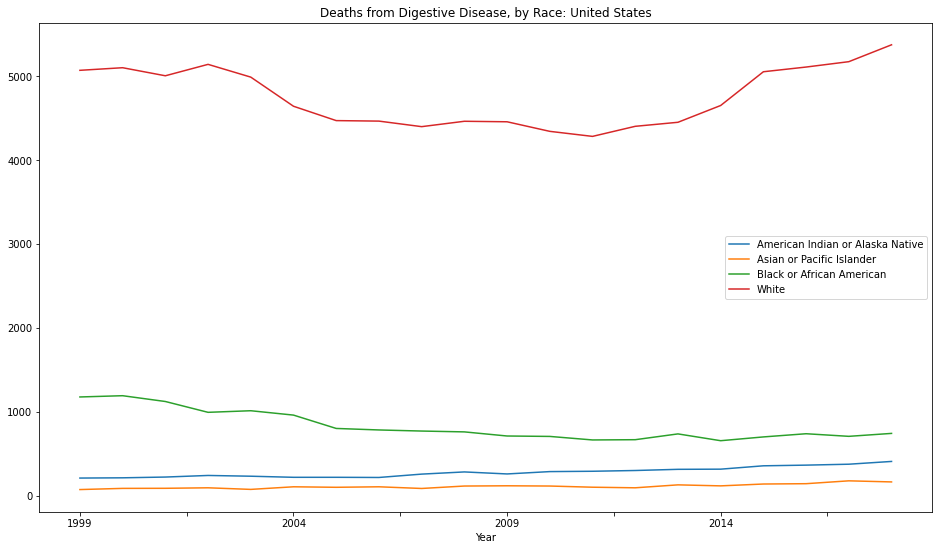

In [21]:

# Store figure and axis for shared plot
fig, ax = plt.subplots()

# Store labels for all race groups
labels = []

# For each group in the groupby object, grab the 'Race' label and create a line plot for it
for key, grp in df.groupby(['Race']):
    ax = grp.plot(ax=ax, kind='line', x='Year', y='Deaths')
    labels.append(key)

# Set the labels for each line using the group labels
lines, _ = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# Configure chart size and title
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.title("Deaths from Digestive Disease, by Race: United States");